In [1]:
# Import data analysis libraries
import pandas as pd
import numpy as np

# Import machine learning libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Set Pandas display options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 500

In [2]:
data_df = pd.read_csv('/Users/nate/MSE/CS 534 - Data Science and Analytics/Kaggle Datasets/Nomad2018_Predicting_Transparent_Conductors/train.csv')

data_df = data_df.rename(columns={'spacegroup' : 'Space_Group',
                            'number_of_total_atoms' : 'N_atoms',
                            'percent_atom_al' : 'x_Al',
                            'percent_atom_ga' : 'x_Ga',
                            'percent_atom_in' : 'x_In',
                            'formation_energy_ev_natom' : 'Formation_Energy',
                            'bandgap_energy_ev' : 'Band_Gap_Energy'})

# Select feature columns
X = data_df.iloc[:, 0:12]

# Select target columns
y = data_df.iloc[:,12:]
y_band_gap = np.array(y['Band_Gap_Energy'])
y_formation = np.array(y['Formation_Energy'])

# Split training and test data sets
X_train, X_test, y_train_bg, y_test_bg = train_test_split(X, y_band_gap, test_size=0.20, random_state=42)

In [8]:
# Define plotting function

def plot_data(x_data, y_data, data_title, x_label, y_label):
    plt.plot(x_data, y_data, color='green', marker='o', linestyle='dashed', linewidth=3, markersize=10)
    plt.title(data_title, color='w', size=22)
    plt.xlabel(x_label, color='w', size=18)
    plt.ylabel(y_label, color='w', size=18)
    plt.xticks(np.arange(0, len(best_score), step=1), color='w', size=16)
    plt.yticks(color='w', size=16)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.grid(b=None, which='major', axis='both')
    plt.show()

Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   1 : 0.8679259591555533
Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   2 : 0.9281927150387165
Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   3 : 0.9404810407259848
Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   4 : 0.9395061209774377
Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   5 : 0.9346169629763165
Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   6 : 0.9295506898788678
Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   7 : 0.9242098969302622
Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   8 : 0.920311577510454
Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   9 : 0.9146279805271673
Accuracy Score of the Band Gap Energy prediction with XGBoost Max Depth   10 : 0.9120270301111852
3 :  0.9404810407259848


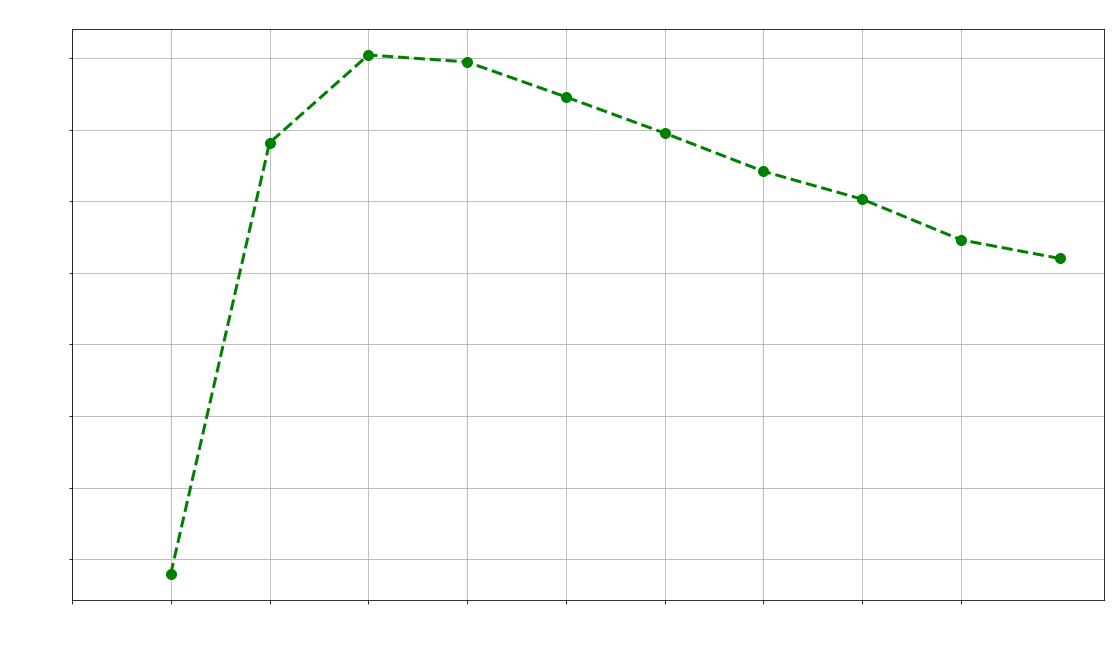

In [48]:
best_score = {}
title = 'Accuracy Score of the Band Gap Energy prediction vs XGBoost Max Depth'
x_label = 'XGBoost Max Depth'
y_label = 'Accuracy Score'

for i in range(1,11):
    params = {'n_estimators': 500, 'max_depth': i, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}
    clf = ensemble.GradientBoostingRegressor(**params)

    clf.fit(X_train, y_train_bg)
    
    best_score.update({i:clf.score(X_test, y_test_bg)})
    
    print(y_label, 'of the Band Gap Energy prediction with', x_label, ' ', i, ': ' \
          + str(clf.score(X_test, y_test_bg)))
    
print(max(best_score, key=best_score.get), ': ', best_score[max(best_score, key=best_score.get)])

best_score_lists = sorted(best_score.items()) # sorted by key, return a list of tuples
x, y = zip(*best_score_lists) # unpack a list of pairs into two tuples
plot_data(x, y, title, x_label, y_label)

In [39]:
# GridCSVSearch: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

parameters = {'loss':('ls', 'lad', 'huber', 'quantile'),
              'max_depth':np.arange(1,11)}
xbg = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(estimator=xbg, param_grid=parameters, n_jobs=-1, cv=5, return_train_score=True,)
clf.fit(X_train, y_train_bg)

print('Grid Search Complete.')

Grid Search Complete.


In [27]:
cv_df = pd.DataFrame(clf.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080585,0.001720,0.001572,0.000049,ls,1,"{'loss': 'ls', 'max_depth': 1}",0.895756,0.912226,0.905259,0.916703,0.910337,0.908056,0.007162,28,0.916743,0.915026,0.916572,0.912851,0.913156,0.914870,0.001640
1,0.159108,0.008753,0.002026,0.000325,ls,2,"{'loss': 'ls', 'max_depth': 2}",0.932268,0.940697,0.941291,0.946862,0.949090,0.942042,0.005845,12,0.956022,0.955626,0.953654,0.955412,0.954361,0.955015,0.000875
2,0.262415,0.005719,0.002080,0.000391,ls,3,"{'loss': 'ls', 'max_depth': 3}",0.941809,0.945201,0.943905,0.948345,0.952283,0.946309,0.003663,4,0.970817,0.969866,0.969000,0.968493,0.968013,0.969238,0.001000
3,0.434222,0.059866,0.002792,0.000663,ls,4,"{'loss': 'ls', 'max_depth': 4}",0.944814,0.944493,0.943897,0.948807,0.953338,0.947070,0.003580,2,0.981066,0.980911,0.980780,0.980723,0.980465,0.980789,0.000200
4,0.594313,0.072977,0.004163,0.001359,ls,5,"{'loss': 'ls', 'max_depth': 5}",0.938970,0.945993,0.938828,0.949553,0.949558,0.944580,0.004818,9,0.989026,0.988213,0.988663,0.988321,0.989444,0.988733,0.000455
5,0.823360,0.056635,0.005439,0.003502,ls,6,"{'loss': 'ls', 'max_depth': 6}",0.937077,0.943513,0.931971,0.950041,0.943808,0.941282,0.006204,14,0.995012,0.994860,0.994446,0.994643,0.994885,0.994769,0.000200
6,1.053197,0.066741,0.003629,0.000504,ls,7,"{'loss': 'ls', 'max_depth': 7}",0.932475,0.939831,0.931321,0.944478,0.941769,0.937975,0.005189,19,0.998391,0.998296,0.998188,0.997981,0.998067,0.998185,0.000148
7,1.364275,0.126807,0.006131,0.002857,ls,8,"{'loss': 'ls', 'max_depth': 8}",0.930260,0.932189,0.917579,0.940168,0.937333,0.931506,0.007810,23,0.999542,0.999549,0.999565,0.999422,0.999514,0.999518,0.000051
8,1.925265,0.149547,0.006222,0.001931,ls,9,"{'loss': 'ls', 'max_depth': 9}",0.924954,0.922693,0.915429,0.938657,0.934595,0.927265,0.008365,24,0.999910,0.999934,0.999894,0.999887,0.999911,0.999907,0.000016
9,2.555034,0.089830,0.007038,0.001436,ls,10,"{'loss': 'ls', 'max_depth': 10}",0.923075,0.913809,0.908860,0.935179,0.933090,0.922802,0.010338,27,0.999993,0.999993,0.999989,0.999992,0.999993,0.999992,0.000002


In [28]:
print('Best estimator: ', clf.best_estimator_)
print('Best score: ', clf.best_score_)
print('Index with best estimator/score: ', clf.best_index_)

Best estimator:  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Best score:  0.9494183345254353
Index with best estimator/score:  23


In [30]:
cv_df.iloc[[clf.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
23,0.836212,0.015609,0.004774,0.004516,huber,4,"{'loss': 'huber', 'max_depth': 4}",0.94457,0.950175,0.943963,0.953761,0.954622,0.949418,0.004467,1,0.976418,0.976267,0.976877,0.976477,0.975907,0.976389,0.000314


In [37]:
print(np.arange(100,1100,100))

[ 100  200  300  400  500  600  700  800  900 1000]


In [52]:
best_score = {}

for i in np.linspace(0.017,0.025,50):
    params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 2,'learning_rate': i, 'loss': 'ls'}
    clf = ensemble.GradientBoostingRegressor(**params)

    clf.fit(X_train, y_train_bg)

    best_score.update({i:clf.score(X_test, y_test_bg)})
    
    print('Accuracy Score of the Band Gap Energy prediction with XGBoost with learning_rate = ', i, ': ' \
          + str(clf.score(X_test, y_test_bg)))
    
print(max(best_score, key=best_score.get), ': ', best_score[max(best_score, key=best_score.get)])

Accuracy Score of the Band Gap Energy prediction with XGBoost with learning_rate =  0.017 : 0.9428439711557832
Accuracy Score of the Band Gap Energy prediction with XGBoost with learning_rate =  0.01716326530612245 : 0.9428866948395942
Accuracy Score of the Band Gap Energy prediction with XGBoost with learning_rate =  0.0173265306122449 : 0.9430473685951254
Accuracy Score of the Band Gap Energy prediction with XGBoost with learning_rate =  0.01748979591836735 : 0.9428234826491556
Accuracy Score of the Band Gap Energy prediction with XGBoost with learning_rate =  0.017653061224489796 : 0.9429606976872126
Accuracy Score of the Band Gap Energy prediction with XGBoost with learning_rate =  0.017816326530612245 : 0.943452089240686
Accuracy Score of the Band Gap Energy prediction with XGBoost with learning_rate =  0.017979591836734695 : 0.943019233021323
Accuracy Score of the Band Gap Energy prediction with XGBoost with learning_rate =  0.018142857142857145 : 0.942600105332286
Accuracy Score

In [67]:
best_score = {}

for i in np.linspace(0.00001,1.0,25):
    params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': i,'learning_rate': 0.021571428571428575, 'loss': 'huber'}
    clf = ensemble.GradientBoostingRegressor(**params)

    clf.fit(X_train, y_train_bg)

    best_score.update({i:clf.score(X_test, y_test_bg)})
    
    print('Accuracy Score of the Band Gap Energy prediction with XGBoost with min_samples_split = ', i, ': ' \
          + str(clf.score(X_test, y_test_bg)))
    
print(max(best_score, key=best_score.get), ': ', best_score[max(best_score, key=best_score.get)])

Accuracy Score of the Band Gap Energy prediction with XGBoost with min_samples_split =  1e-05 : 0.9404522349607908
Accuracy Score of the Band Gap Energy prediction with XGBoost with min_samples_split =  0.041676250000000005 : 0.941086860020712
Accuracy Score of the Band Gap Energy prediction with XGBoost with min_samples_split =  0.0833425 : 0.9394483451248493
Accuracy Score of the Band Gap Energy prediction with XGBoost with min_samples_split =  0.12500875 : 0.9388986859346266
Accuracy Score of the Band Gap Energy prediction with XGBoost with min_samples_split =  0.16667500000000002 : 0.9387927268671228
Accuracy Score of the Band Gap Energy prediction with XGBoost with min_samples_split =  0.20834125000000003 : 0.9383665574654323
Accuracy Score of the Band Gap Energy prediction with XGBoost with min_samples_split =  0.2500075 : 0.9368838737339559
Accuracy Score of the Band Gap Energy prediction with XGBoost with min_samples_split =  0.29167375 : 0.932586367643945
Accuracy Score of the

In [62]:
# best_score = {}

# loss_func_list = ['ls', 'lad', 'huber', 'quantile']

for i in loss_func_list:
    params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 0.9434718052807357,'learning_rate': 0.021571428571428575, 'loss': 'ls'}
    clf = ensemble.GradientBoostingRegressor(**params)

    clf.fit(X_train, y_train_bg)

#     best_score.update({i:clf.score(X_test, y_test_bg)})
    
    print('Accuracy Score of the Band Gap Energy prediction with XGBoost with max_depth = ', i, ': ' \
          + str(clf.score(X_test, y_test_bg)))
    
print(max(best_score, key=best_score.get), ': ', best_score[max(best_score, key=best_score.get)])

Accuracy Score of the Band Gap Energy prediction with XGBoost with max_depth =  ls : 0.9189794518219396
Accuracy Score of the Band Gap Energy prediction with XGBoost with max_depth =  lad : 0.9189794518219395
Accuracy Score of the Band Gap Energy prediction with XGBoost with max_depth =  huber : 0.9189794518219395
Accuracy Score of the Band Gap Energy prediction with XGBoost with max_depth =  quantile : 0.9189794518219396
ls :  0.9189794518219396


In [63]:
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 0.9434718052807357,'learning_rate': 0.021571428571428575, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train_bg)

    
print('Accuracy Score of the Band Gap Energy prediction with XGBoost with max_depth = ', i, ': ' \
      + str(clf.score(X_test, y_test_bg)))

Accuracy Score of the Band Gap Energy prediction with XGBoost with max_depth =  quantile : 0.9189794518219395


In [ ]:
y_band_gap = np.asarray(y['Band_Gap_Energy'].values.reshape(-1,1))
y_formation = np.asarray(y['Formation_Energy'].values.reshape(-1,1))

print('Shape of y_band_gap: ' + str(y_band_gap.shape))
print('Shape of y_formation: ' + str(y_formation.shape))